In [19]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

$\textbf{Bonus:}$ Coupled oscillators with dissipation

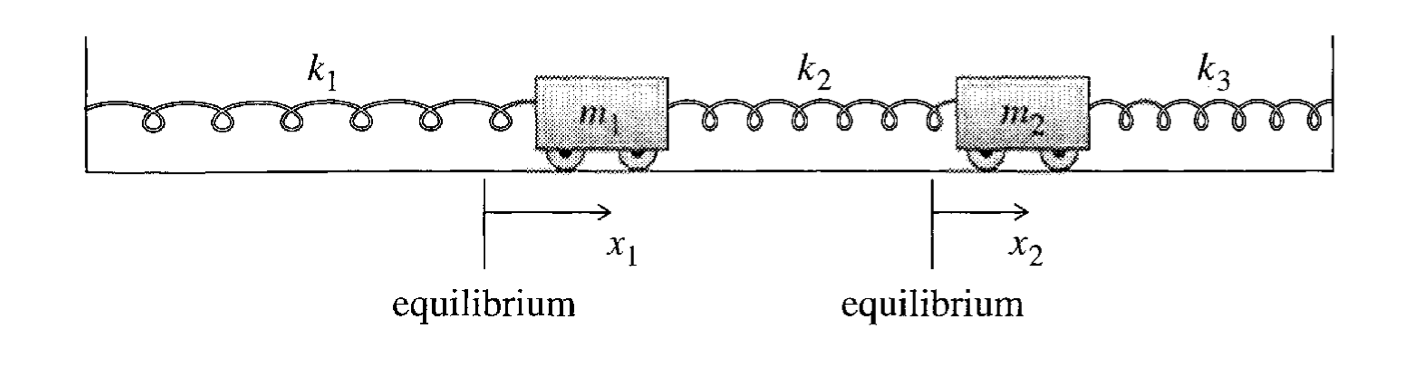

In [20]:
Image(filename='./Springs-Carts1.png')

Consider again the coupled oscillator system in the figure composed of two carts and three springs. For this question, Assume that $m_{1} = m_{2} = m$, $k_1 = k_2 = k_3 = k$. Now suppose there is a dissipative force $-b \textbf{v}$ acting on each mass (same $b$ for both masses). Assume that initially, when the system is at rest, the springs are all at their equilibrium lengths.

(i) What are the equations of motions for $x_1(t)$ and $x_2(t)$?
    
Re-define $ k \rightarrow \frac{k}{m}$, $b \rightarrow \frac{b}{m}$:

$$ \ddot{x}_1 + b \ddot{x}_1 = -2k x_1 + k x_2 $$

$$ \ddot{x}_2 + b \dot{x}_2 = k x_1 - 2 k x_2 $$

(ii) Solve for the normal modes and normal frequencies of this system, assuming $b$ is small so that the system is underdamped. You can do this either by changing variables to a new convenient set or by using matrix methods.

Method 1: Changing Variables.

Add and subtract the two EOMs, and define $y_1 = x_1 + x_2$, $y_2 = x_1 - x_2$ to get:

$$\ddot{y}_1 + b \dot{y}_1 = -k y_1$$
$$\ddot{y}_2 + b \dot{y}_2 = - 3k y_2$$

Put $y_i(t) = A_i e^{i \omega_i t}$:

$$\omega_1^2 - i b \omega_1 - k = 0$$
$$\omega_2^2 - i b \omega_2 - 3k = 0$$


$$\omega_{1, \pm} = \frac{ib \pm \sqrt{4k - b^2}}{2}$$
$$\omega_{2, \pm} = \frac{ib \pm \sqrt{12k - b^2}}{2}$$

The normal modes are obtained by the conditions: $y_2 = 0$, for the mode corresponding to $\omega_{1, \pm}$, and $y_1 = 0$ for $\omega_{2,\pm}$. This simply corresponds to:

$$x_1 = x_2$$
$$x_1 = -x_2$$


respectively.

Method 2: Matrix Methods

The eigenvalue equation reads:
$$-(\omega^2 - ib\omega) \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = - \begin{pmatrix} 2k & -k \\ -k & 2k \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}$$

Which has the characteristic equation: 


$$(\omega^2 - ib \omega - 2k)^2 - k^2 = 0$$
$$\implies (\omega^2 - ib \omega - 3k) (\omega^2 -ib\omega -k) = 0$$
$$\implies \omega_{1, \pm} = \frac{ib \pm \sqrt{4k - b^2}}{2} \text{, } \omega_{2, \pm} = \frac{ib \pm \sqrt{12k - b^2}}{2}$$


Substituting this into the eigenvalue equation gives (after some algebra):

$$x_1 = x_2$$
$$x_1 = -x_2$$

for the two modes respectively. Remember that we have to put back $k \rightarrow \frac{k}{m}$, and $b \rightarrow \frac{b}{m}$.

(iii) Write down the general solution for $x_1(t)$ and $x_2(t)$.


$$x_1(t) = A e^{-\frac{bt}{2m}} \cos\left(\sqrt{\frac{4k}{m} - \frac{b^2}{m^2}} \, t + \phi_1\right) + B e^{-\frac{bt}{2m}} \cos\left(\sqrt{\frac{12k}{m} - \frac{b^2}{m^2}}\, t + \phi_2\right)$$
$$x_2(t) = A e^{-\frac{bt}{2m}} \cos\left(\sqrt{\frac{4k}{m} - \frac{b^2}{m^2}}\, t + \phi_1\right) - B e^{-\frac{bt}{2m}} \cos\left(\sqrt{\frac{12k}{m} - \frac{b^2}{m^2}}\, t + \phi_2\right)$$

    
    
(iv) Write down $x_1(t)$ and $x_2(t)$ for the initial conditions: $x_1(0) = A$, $x_2(0) = 0$, $v_1(0) = 0$, $v_2(0) = 0$. Plot them for $0 \leq t \leq 10 \pi$, for the values $A = k = m = 1$ and $b = 0.1$.

$$\phi_1 = \sin^{-1}\left(-\frac{b}{2 m \omega_1}\right)$$
$$\phi_2 = \tan^{-1} \left( \frac{\omega_{1,+}}{\omega_{2,+}} \phi_1\right) = \tan^{-1}\left(\sqrt{\frac{4mk - b^2}{12mk - b^2}} \tan{\phi_1}\right)$$
$$ A = \frac{1}{2 \cos(\phi_1)}$$
$$B = A \frac{\cos\phi_1}{\cos\phi_2}$$

In [21]:
t = np.linspace(0,10*np.pi, 1001)
x0 = k = m = 1
b = 0.1

om1 = np.sqrt(4*k/m - b**2/m**2)
om2 = np.sqrt(12*k/m - b**2/m**2)

p1 = np.arcsin(-b/(2*m*om1))
p2 = np.arctan(om1/om2 * np.tan(p1))
A = 1/(2*np.cos(p1))
B = A * np.cos(p1)/np.cos(p2)

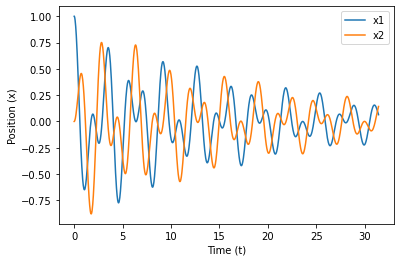

In [22]:
x_1 = A * np.exp(-b*t/(2*m))*np.cos(om1 * t + p1) + B * np.exp(-b*t/(2*m)) * np.cos(om2 * t + p2)
x_2 = A * np.exp(-b*t/(2*m))*np.cos(om1 * t + p1) - B * np.exp(-b*t/(2*m)) * np.cos(om2 * t + p2)
v_1 = -(b/(2*m)) * x_1 - A * np.exp(-b*t/(2*m))* om1 * np.sin(om1 * t + p1) - B * np.exp(-b*t/(2*m)) * om2 * np.sin(om2 * t + p2)
v_2 = -(b/(2*m)) * x_2 - A * np.exp(-b*t/(2*m))* om1 * np.sin(om1 * t + p1) + B * np.exp(-b*t/(2*m)) * om2 * np.sin(om2 * t + p2)
plt.plot(t, x_1, label = 'x1')
plt.plot(t, x_2, label = 'x2')
plt.xlabel("Time (t)")
plt.ylabel("Position (x)")
plt.legend()
plt.show()

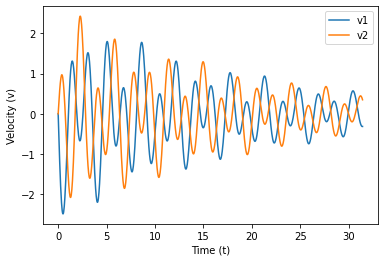

In [23]:
plt.plot(t, v_1, label = 'v1')
plt.plot(t, v_2, label = 'v2')
plt.xlabel("Time (t)")
plt.ylabel("Velocity (v)")
plt.legend()
plt.show()

It can be seen that the initial conditions are all satisfied. While these curves look weird, we can plot the variables $y_1(t)$ and $y_2(t)$ and check that they are indeed just uncoupled damped oscillator curves with different frequencies, as one would expect:

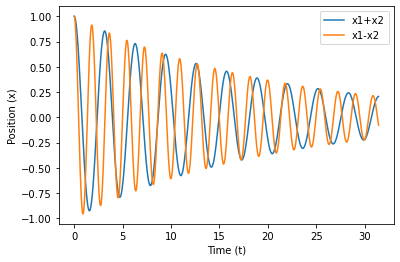

In [24]:
plt.plot(t, x_1 + x_2, label = 'x1+x2')
plt.plot(t, x_1 - x_2, label = 'x1-x2')
plt.xlabel("Time (t)")
plt.ylabel("Position (x)")
plt.legend()
plt.show()